In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
import tqdm

In [15]:

#h5ファイルからモデルを読み込む
model = tf.keras.models.load_model("models/0118_model_CNN_Adam.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1, 1, 1280)       4048991   
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 10248     
                                                                 
Total params: 4,059,239
Trainable params: 4,017,220
Non-trainable params: 42,019
_________________________________________________________________


In [26]:


# 実際に値を入れてみる
# csvファイルからデータを読み込む
data = pd.read_csv("モデル読み込み用.csv",).values
# 入力データ
len_test = 8
x = data[:, len_test+1:]

# x[i]をN×Nに変換
siz = 32
x = x.reshape(-1, siz, siz)

# 出力データ
y = data[:, :len_test]
# 入力データの正規化
x = (x - x.mean()) / x.std()

# 入力データの各行をN×Nに変換

#CNNに入力
y_pred = model.predict(x)
y

1/1 [==============================] - 0s 36ms/step


array([[ 0.,  4., 15., 16.,  7., 23., 17.,  2.]])

In [21]:
routes = y_pred * 32
#2x4の配列に変換
routes = routes.reshape(-1, 4, 2)
routes

array([[[ 8.796271, 14.828531],
        [14.980984, 15.985916],
        [15.929797, 17.130184],
        [12.311274, 21.55907 ]]], dtype=float32)

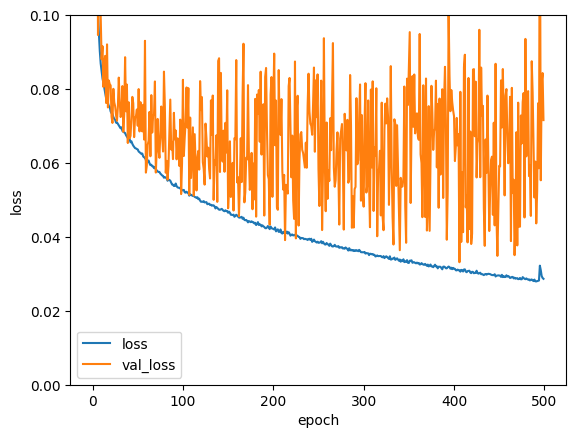

In [3]:
#resultの読み込み
prefix = "0118_model_CNN_with_ImageNet"

#val_loss, lossをグラフにする
# %%
import matplotlib.pyplot as plt

# データの読み込み
history = pd.read_csv("models/"+prefix+".csv",)
#indexを反映
#lossとval_lossをプロット
history.plot(x="Unnamed: 0", y=["loss", "val_loss"])

# plotの上限を設定
plt.ylim(0, 0.1)
plt.legend()
ax = plt.gca()

# 軸ラベルを追加
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

plt.show()
